# Task 3
https://archive.ics.uci.edu/ml/datasets/Computer+Hardware

In [274]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import padasip as pa
import numpy as np
from numpy.random import default_rng
rng = default_rng(257) # seed

In [48]:
!wget --recursive --no-parent -nd -c https://archive.ics.uci.edu/ml/machine-learning-databases/cpu-performance/ -P ./data/

--2021-02-17 17:50:07--  https://archive.ics.uci.edu/ml/machine-learning-databases/cpu-performance/
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 627 [text/html]
Saving to: ‘./data/index.html’

index.html          100%[===================>]     627  --.-KB/s    in 0s      

2021-02-17 17:50:08 (18.7 MB/s) - ‘./data/index.html’ saved [627/627]

Loading robots.txt; please ignore errors.
--2021-02-17 17:50:08--  https://archive.ics.uci.edu/robots.txt
Reusing existing connection to archive.ics.uci.edu:443.
HTTP request sent, awaiting response... 404 Not Found
2021-02-17 17:50:08 ERROR 404: Not Found.

--2021-02-17 17:50:08--  https://archive.ics.uci.edu/ml/machine-learning-databases/cpu-performance/Index
Reusing existing connection to archive.ics.uci.edu:443.
HTTP request sent, awaiting response... 200 OK
Length: 122 [appli

In [49]:
df = pd.read_csv('data/machine.data', names=['vendor name', 'Model Name', 'MYCT', 'MMIN', 'MMAX', 'CACH', 'CHMIN', 'CHMAX', 'PRP', 'ERP'])
df

,vendor name,Model Name,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
0,adviser,32/60,125,256,6000,256,16,128,198,199
1,amdahl,470v/7,29,8000,32000,32,8,32,269,253
2,amdahl,470v/7a,29,8000,32000,32,8,32,220,253
3,amdahl,470v/7b,29,8000,32000,32,8,32,172,253
4,amdahl,470v/7c,29,8000,16000,32,8,16,132,132
...,...,...,...,...,...,...,...,...,...,...
204,sperry,80/8,124,1000,8000,0,1,8,42,37
205,sperry,90/80-model-3,98,1000,8000,32,2,8,46,50
206,sratus,32,125,2000,8000,0,2,14,52,41
207,wang,vs-100,480,512,8000,32,0,0,67,47


In [267]:
X = df.drop(columns=['vendor name', 'Model Name', 'PRP', 'ERP']).to_numpy()
y = df['PRP'].to_numpy()

# scaler = StandardScaler()
# X = scaler.fit_transform(X)
X = (X - np.mean(X, axis=0)) / np.std(X, axis=0) # standardise X

N = X.shape[0] # number of data
p = X.shape[1] # number of features

In [268]:
w_sgd = rng.random(p)
learning_rate_sgd = 1e-3
maxIter_sgd = 5000
iterError_sgd = np.zeros(maxIter_sgd+1)

iterError_sgd[0] = (y - X@w_sgd).T @ (y - X@w_sgd)

for i in range(maxIter_sgd):
    j = rng.integers(low=0, high=y.shape[0])
    x_iter = X[j] # random sample of X
    y_iter = y[j] # random sample of Y

    error_diff_sgd = -(y_iter - w_sgd.T@x_iter) * x_iter # derivative of error
    w_sgd -= learning_rate_sgd * error_diff_sgd # sgd update
    iterError_sgd[i+1] = (y - X@w_sgd).T @ (y - X@w_sgd) # error
    

y_sgd = X @ w_sgd

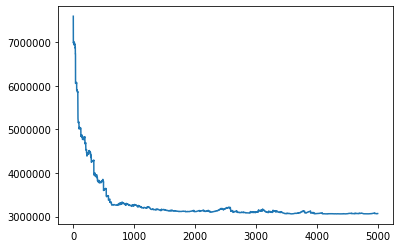

In [269]:
# NOTE: Because X is standardised and y is not, the error provided will have a large difference

plt.plot(iterError_sgd)

In [287]:
w_rls = np.zeros((p, 1))
lambda_rls = 0.6
P = np.identity(p)
iterError_rls = np.zeros(y.shape[0]+1)

iterError_rls[0] = (y[0] - X[0].T @ w_rls)**2

for i, (x_n, y_n) in enumerate(zip(X, y)):
    x_n = x_n.reshape(-1, 1)

    error = y_n - x_n.T @ w_rls
    k_n = P @ x_n / (lambda_rls + x_n.T @ P @ x_n)
    P = (P - k_n @ x_n.T @ P) / lambda_rls
    w_rls += k_n * error
    iterError_rls[i+1] = y_n - x_n.T @ w_rls
    
y_rls = X @ w_rls

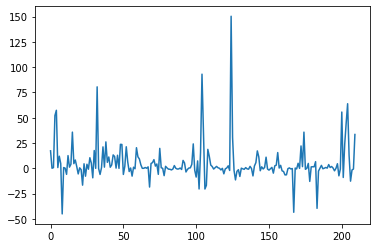

In [288]:
plt.plot(iterError_rls)

# Task 4

In [291]:
f = pa.filters.FilterRLS(n=X.shape[1], mu=0.6, eps=1, w="zeros")
y_pa, e, w = f.run(y, X)

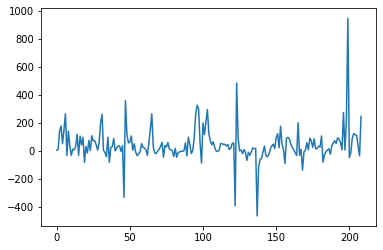

In [292]:
plt.plot(e)